# Taylor Approximation
- Can I constuct a polinomial $p$ that has exactly the same derivatives as a reference function at point $a$? 
- If so, I could use it to approximate the $f$ at points other than $a$
- The only things I need to know are the (infinite) derivatives of $f$ at $a$, and a small guarantee that $f$ is well behaved.


$$ p(x) = \sum_{i=0}^{\infty}\frac{f^{(i)}(a)(x-a)^i}{i!} $$

In [7]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = 15, 4


x = torch.Tensor(np.linspace(-3, 3, 1000))
a = torch.tensor(0)


def get_taylor(x: np.ndarray, a: float=0, derivatives: list=None):
    """
    Taylor approximation
    :param x: point or points (array) to evaluate at
    :param a: point for which the evaluation of f is known
    :param derivatives: an array of derivatives at point a
    """
    derivatives = [] if derivatives is None else derivatives
    return sum([derivative * (x-a)**i / math.factorial(i) for i, derivative in enumerate(derivatives)])


def get_derivatives(f, a: float = 0., n: int = 3):
    """
    ftion that retunes the derivatives of a ftion evaluated at point a. Fills with zeros if it runs out of derivatives.
    :param f: the function to differentiate
    :param a: the point at which we can have the derivatives
    :param n: number of derivatives to take
    """
    a = torch.tensor(a, requires_grad=True)
    derivative = f(a)
    res = [derivative.detach().item()]
    for _ in range(n-1):
        if derivative.grad_fn is None:
            res.append(.0)
            continue
        derivative = torch.autograd.grad(derivative, a, create_graph=True)[0]
        res.append(derivative.detach().item())
    return res

## 0. Functions
- Defining 3 functions to do a taylor approximation on
- Fist is a sine function, the second a ploynomial, and the third a combination of the two

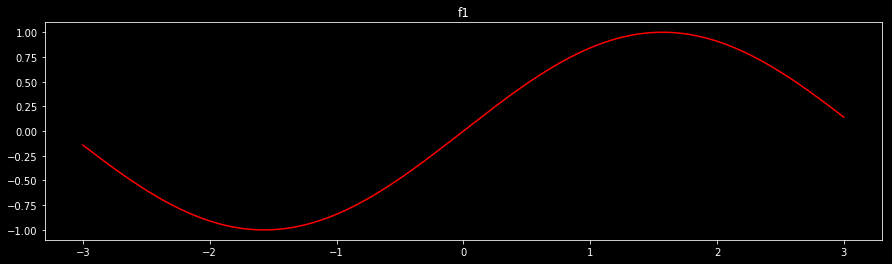

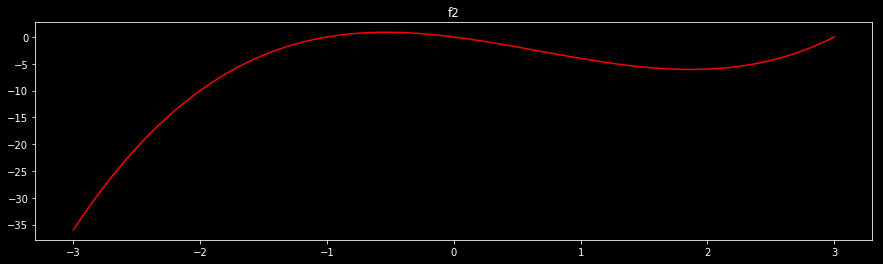

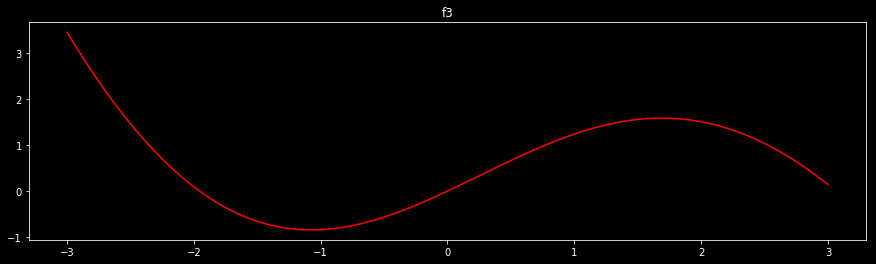

In [8]:
f1 = torch.sin
f2 = lambda x: x**3 - 2*x**2 - 3*x
f3 = lambda x: f1(x) - 0.1 * f2(x)

plt.title('f1')
plt.plot(x.numpy(), f1(x).numpy(), color='red')
plt.show()


plt.title('f2')
plt.plot(x.numpy(), f2(x).numpy(), color='red')
plt.show()


plt.title('f3')
plt.plot(x.numpy(), f3(x).numpy(), color='red')
plt.show()

## 1. Visualising the Taylor Terms
- Plotting the individual components of the taylor series at each point of x, before combining them for the actual approximation

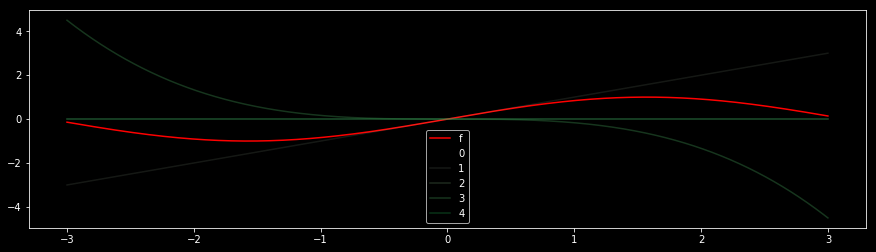

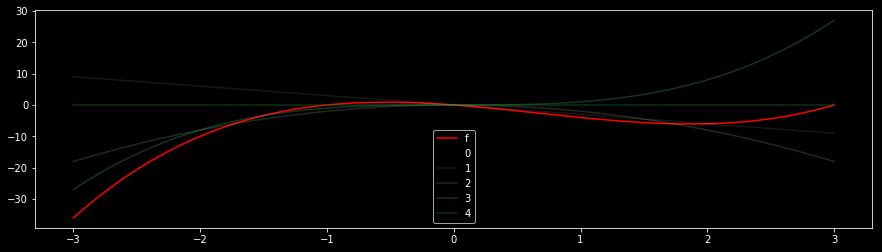

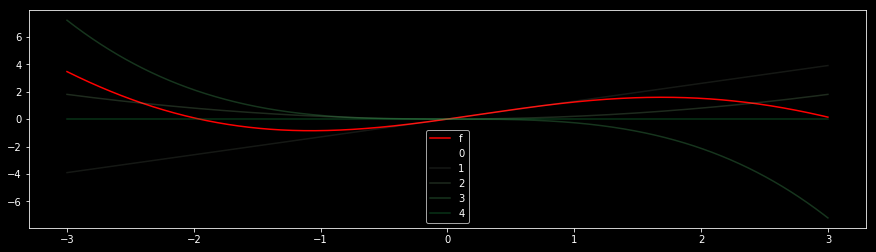

In [9]:
def plot_taylor_terms(f, x, a: float = 0., n: int = 5):
    plt.plot(x.numpy(), f(x).numpy(), label='f', color="red")
    derivs = get_derivatives(f, a=a, n=n)
    for i in range(len(derivs)):
        term = derivs[i] * (x-a)**i / math.factorial(i)
        plt.plot(x.numpy(), term.numpy(), label=str(i), alpha=i*.1, color=plt.cm.Greens(i/n))
    plt.legend()
    plt.show()
        
plot_taylor_terms(f1, x)
plot_taylor_terms(f2, x)
plot_taylor_terms(f3, x)

## 2. Visualising the Approximation
- The actual taylor approximation over the domain
- The approximation gets better the more terms we add

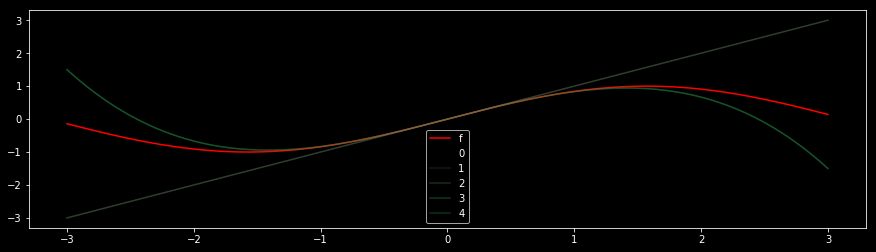

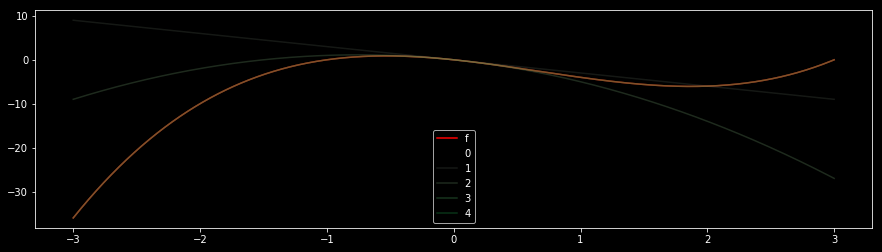

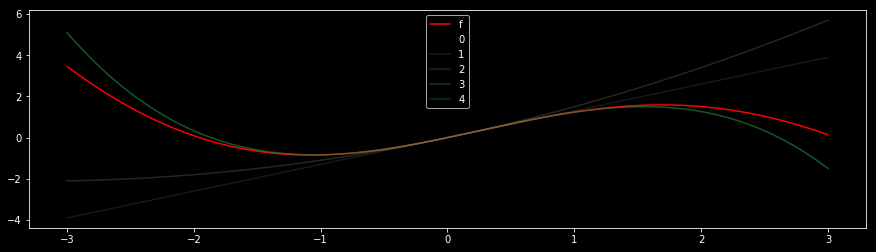

In [10]:
def plot_approximations(f, x: np.ndarray, a: float = 0., n: int = 5):
    """
    Plot the approximation of f with increasing degrees
    :param f: the ftion to differentiate
    :param a: the point at which we can have the derivatives
    :param n: maximum number of taylor terms to use
    """
    plt.plot(x.numpy(), f(x).numpy(), label='f', color="red")
    derivs = get_derivatives(f, a=a, n=n)
    for i in range(len(derivs)):
        plt.plot(x.numpy(), get_taylor(x, a=a, derivatives=derivs[:i+1]).numpy(), label=str(i), alpha=i*.1, color=plt.cm.Greens(i/n))
    plt.legend()
    plt.show()

    
plot_approximations(f1, x)
plot_approximations(f2, x)
plot_approximations(f3, x)

## 3. Error wrt to Derivatives
- Plot how the mean approximation error decreases as we add more terms to the taylor series

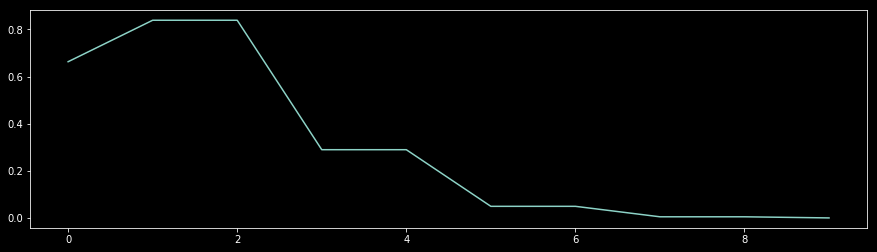

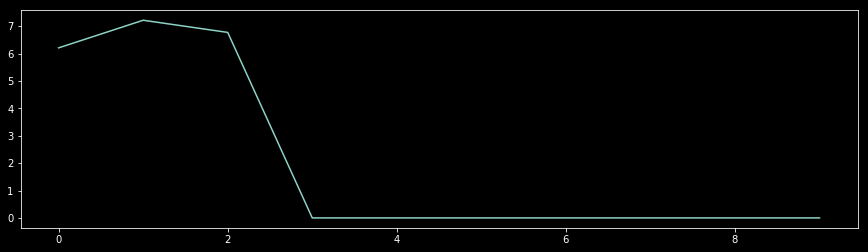

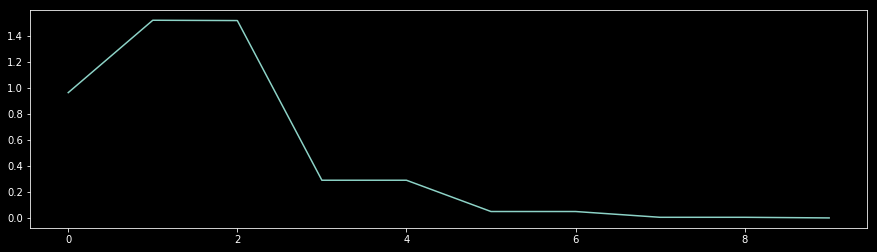

In [11]:
def plot_derivative_error(f, x: np.ndarray, a: float = 0., n: int = 5):
    """
    :param f: the ftion to differentiate
    :param a: the point at which we can have the derivatives
    :param n: maximum number of taylor terms to use
    """
    derivs = get_derivatives(f, a=a, n=n)
    errors = []
    for i in range(len(derivs)):
        approx = get_taylor(x, a=a, derivatives=derivs[:i+1])
        error = np.abs(f(x) - approx).mean()
        errors.append(error)
    plt.plot(errors)
    plt.show()
    
plot_derivative_error(f1, x, n=10)
plot_derivative_error(f2, x, n=10)
plot_derivative_error(f3, x, n=10)

## 4. Error wrt to Distance
- Plot the error at each point of the domain
- Error increases as farther we go from $a$

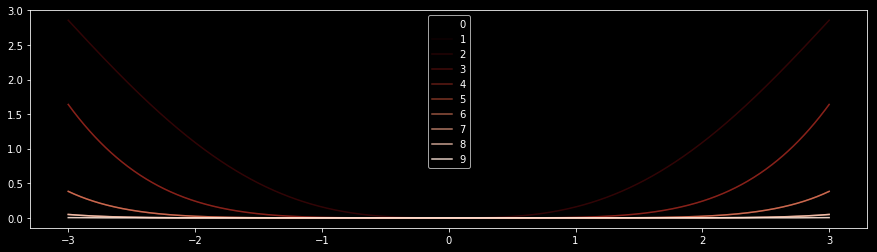

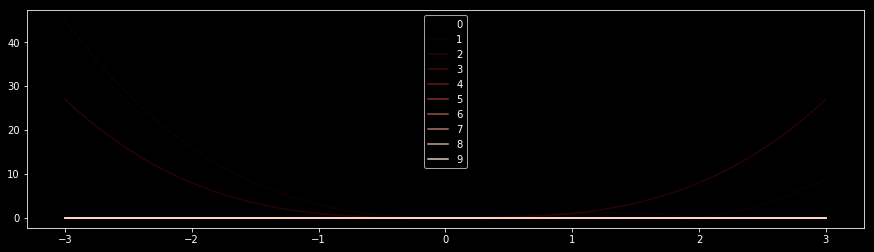

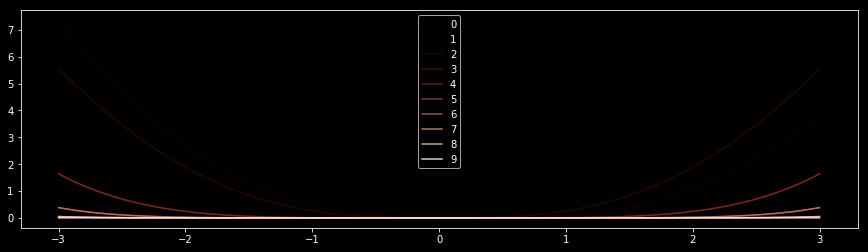

In [12]:
def plot_distance_error(f, x: np.ndarray, a: float = 0., n: int = 5):
    """
    :param f: the ftion to differentiate
    :param a: the point at which we can have the derivatives
    :param n: maximum number of taylor terms to use
    """
    derivs = get_derivatives(f, a=a, n=n)
    for i in range(len(derivs)):
        approx = get_taylor(x, a=a, derivatives=derivs[:i+1])
        error = np.abs(f(x) - approx)
        plt.plot(x.numpy(), error.numpy(), label=str(i), alpha=i*.1, color=plt.cm.Reds((n-i)/n))
    plt.legend()
    plt.show()
    
plot_distance_error(f1, x, n=10)
plot_distance_error(f2, x, n=10)
plot_distance_error(f3, x, n=10)